## Data processing

In [ ]:
%cd /content/drive/MyDrive/__Szakdolgozat/Modszertan

/content/drive/MyDrive/__Szakdolgozat/Modszertan


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('soft_2018.csv')
df.tail()

In [ ]:
#sum([len(str(i)) for i in df['candidate']])

1853619

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   native_id     8676 non-null   int64 
 1   title         8676 non-null   object
 2   company       8676 non-null   object
 3   candidate     7891 non-null   object
 4   description   8448 non-null   object
 5   date_posted   8676 non-null   object
 6   date_expired  8676 non-null   object
 7   title_en      8676 non-null   object
 8   candidate_en  8676 non-null   object
dtypes: int64(1), object(8)
memory usage: 610.2+ KB


In [ ]:
df=df.set_index('native_id')

In [ ]:
df.head()

,title,company,candidate,description,date_posted,date_expired
native_id,,,,,,
1351155,"Contabil,economist,Ing.constructor,automatist,...",CONFIDENTIAL,Detalii la interviu.Salariul este cu titlu inf...,La interviu,2021-01-01,2021-02-01
1351159,"Software Developer (C#, .NET)",ifm efector srl,- Technical University degree (Computer scienc...,As a Software Engineer on our Industrializatio...,2021-01-01,2021-02-01
1351172,Specialist IT,Dicor Land SRL,"Te așteptăm în echipa Dicor Land, o echipă pro...","Ca Specialist IT, în cadrul Dicor Land, te vei...",2021-01-02,2021-01-10
1351181,Client Advisor with Italian - Bucharest / Brasov,Computer Generated Solutions Romania SRL,"#CGS Remote In the light of recent events, we...","-Provide support to customers, including proce...",2021-01-03,2021-02-03
1351182,Client Advisor with German - Brasov / Bucharest,Computer Generated Solutions Romania SRL,We are looking to expand our team of Champions...,"• Provide support, including procedural docume...",2021-01-03,2021-02-03


# Cheking missing data

In [ ]:
import seaborn as sns

cols = df.columns
colours = ['#66C5CC', '#F6CF71']

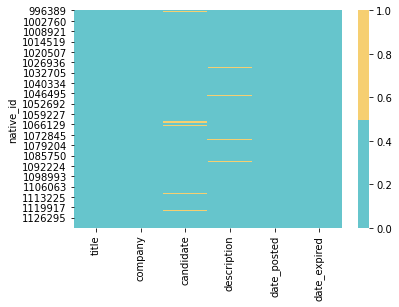

In [ ]:
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
df['candidate'].fillna(df['description'],inplace=True)

In [ ]:
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
df=df.dropna()

In [ ]:
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
df.head()

# Translating to English

In [ ]:
df['title_en']='en'
df['candidate_en']='en'

In [ ]:
!pip install googletrans==3.1.0a0
from googletrans import Translator
translator = Translator()

In [ ]:
for i in range(203,206):
  df['title_en'].iloc[i]=translator.translate(df['title'].iloc[i], src='auto', dest='en').text
  df['candidate_en'].iloc[i]=translator.translate(df['candidate'].iloc[i], src='auto', dest='en').text

# Skill column

In [ ]:
df.insert(3,"skill",True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11946 entries, 996389 to 1132044
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         11946 non-null  object
 1   company       11946 non-null  object
 2   candidate     11945 non-null  object
 3   skill         11946 non-null  bool  
 4   description   11946 non-null  object
 5   date_posted   11946 non-null  object
 6   date_expired  11946 non-null  object
 7   title_en      11946 non-null  object
 8   candidate_en  11946 non-null  object
dtypes: bool(1), object(8)
memory usage: 851.6+ KB


In [ ]:
df['skill']=df['candidate_en'].str.lower()

In [ ]:
df.tail()

,title,company,candidate,skill,description,date_posted,date_expired,candidate_en,title_en
native_id,,,,,,,,,
1379219,Operations Specialist with English & Russian,APT RESOURCES & SERVICES SRL,"For our client, a well-known leader in persona...",for our client a well-known leader in personal...,"Responsibilitiеs: Analyze, аpprovе and plаce ...",2021-03-31,2021-04-30,"For our client, a well-known leader in persona...",Operations Specialist with English & Russian
1379221,Technical Support Analyst,UBISOFT ROMANIA,Your main mission The Technical Support Analys...,your main mission the technical support analys...,What you’ll do Provide second level support f...,2021-03-31,2021-04-30,Your main mission The Technical Support Analys...,Technical Support Analyst
1379237,Technical Support Engineer,Avery Dennison SRL,WHAT YOU’LL BE DOING: As Technical Support En...,what you’ll be doing as technical support engi...,WHAT YOU WILL NEED TO BRING TO THE TEAM: Ave...,2021-03-31,2021-04-30,WHAT YOU’LL BE DOING: As Technical Support En...,Technical Support Engineer
1379250,Dezvoltator JAVA,SOLIDSOFT SRL,este Freelancer,this freelancer,Dezvoltare de aplicaţii web folosind limbajul ...,2021-03-31,2021-04-08,this Freelancer,JAVA developer
1379258,TEHNICIAN IT,Power Net Consulting,Studii tehnice reprezinta un avantaj; Experien...,technical studies are an advantage experience ...,Diagnoza si reparatia pentru toata gama de ech...,2021-03-31,2021-04-30,Technical studies are an advantage; Experience...,IT TECHNICIAN


In [ ]:
for oszlopnev in ['skill']:
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace(',','').str.replace('\. ', ' ').str.replace('?', '').str.replace('img: ', '').str.replace('______','')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace(')', '').str.replace('(', '').str.replace(';', '').str.replace(':', '').str.replace('\         \*','') 
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('“', '').str.replace('”', '').str.replace('\– ', '').str.replace('- ', '').str.replace('\         \* ',' ') 
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('\/', ' ').str.replace('"','').str.replace('❒ ','').str.replace(' \-          ',' ').str.replace(' \·      ',' ') 
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('\ \[\😊\]\ \!','').str.replace(' [😊] !','').str.replace('\• ','').str.replace('\- ','').str.replace('❖ ','') 
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('                    ',' ').str.replace('            ',' ').str.replace(' •             ',' ').str.replace(' •        ',' ')   
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('\n', ' ').str.replace(' & ',' ').str.replace('!', '').str.replace('•','').str.replace('\r\n·         ',' ')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace(' ·        ',' ').str.replace('                    o ',' ').str.replace('               \+ ',' ').str.replace('\♦ ','')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('● ','').str.replace('\r ',' ').str.replace('etc…',' ').str.replace('\uf099 ','').str.replace(' ⏱️','')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('\                 ',' ').str.replace('\• ','').str.replace(' ■','').str.replace('          \• ',' ')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('• ',' ').str.replace('\u200b','').str.replace(' ✔️ ',' ').str.replace('\*','').str.replace(' 🏠','') 
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('· ','').str.replace('\t','').str.replace(' \-',' ').str.replace('·� ','').str.replace(' \•           ',' ')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('\* ','').str.replace(' •',' ').str.replace('▪ ','').str.replace('� ','').str.replace(' 🔥🔥🔥','') 
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('— ','').str.replace('\uf0b7 ','').str.replace('· ','').str.replace('➔ ','').str.replace('\n      ',' ')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace(' \+\+\+',' ').str.replace('„','').str.replace('ø ','').str.replace(' 😉','').str.replace('🙂', '')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('− ','').str.replace(' \+','').str.replace('\…','').str.replace('☕ ','').str.replace(' \►',' ').str.replace('\™','') 
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('► ','').str.replace('&',' ').str.replace('😊 ','').str.replace('®','').str.replace('➡️ ','').str.replace(' [😊]','')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace(' ------------------------------------------------------------------- ','').str.replace(' ➤ ',' ').str.replace(' →','')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('\--------------------------','').str.replace(' \– ',' ').str.replace(' ✔️',' ').str.replace('✔️','')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('★ ','').str.replace('\                     ',' ').str.replace('😉','').str.replace('\           \- ',' ')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('🖖 ','').str.replace('📚 ','').str.replace('\r\n•           ',' ').str.replace(' 📖','').str.replace('\✓ ','')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('\uf0be ','').str.replace('✨ ','').str.replace('🔥 ','').str.replace(' > ',' ').str.replace(' o ',' ')   
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('👥 ','').str.replace('💡 ','').str.replace('\n      ',' ').str.replace(' 👩🏻\u200d🚀',' ').str.replace('\-\-\-\-','')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('💻 ','').str.replace(' 🌐','').str.replace('\  \·         ',' ').str.replace('\ \·         ',' ').str.replace('✔','') 
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('👩🏻\u200d🚀',' ').str.replace(' ✅ ',' ').str.replace(' ❤️','').str.replace(' 🗽','').str.replace('\.\.\.',' ') 
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('\·\xa0\xa0\xa0\xa0\xa0\xa0 ','').str.replace('●','').str.replace('✌️ ','').str.replace(' 😊',' ').str.replace('\'','')  
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('\👨\u200d👩\u200d','').str.replace(' ___',' ').str.replace(' 👥💻📞','').str.replace(' \uf0d8','')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace(' \------------------------',' ').str.replace('[😊] ','').str.replace('    \xa0         \* \xa0',' ')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('\n    ·\xa0\xa0\xa0\xa0\xa0\xa0','').str.replace(' \•          ',' ').str.replace('\           •\xa0',' ')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('\uf0a7 ','').str.replace('_ ','').str.replace('= ','').str.replace('{ ','').str.replace(' \------------ ',' ')    
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('\xa0','').str.replace('➢ ','').str.replace(' �','').str.replace('\[\] ','').str.replace('\ \‐ ',' ')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace(' }','').str.replace('\|\| ','').str.replace(' \#',' ').str.replace(' \|','').str.replace('\.\.',' ')   
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace(' _______________________________________________________________________________',' ').str.replace('\uf0d8','')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace('\u200b⁃\u200b','').str.replace('  ', ' ').str.replace(' \uf0fc','').str.replace('- ',' ').str.replace('\+',' ')
  df[oszlopnev]=df[oszlopnev].astype('str').str.replace(r'[.]$','').str.replace(r'^-','').str.replace(r'^-','').str.replace(r'^ ','')

In [ ]:
df['skill'].tail(20)

native_id
1131743    we dont want you to know everything you want t...
1131764    shows organizational skills team spirit and go...
1131776    what we require from you 3 to 5 years of exper...
1131783    enthusiasm for your work and for working in a ...
1131821    minimum bachelors degree preferred relevant pr...
1131873    we are looking for orderly conscientious peopl...
1131887    required experience  knowledge english languag...
1131903    knowledge of php javascript json jquery css ht...
1131908    2-3 years experience in working with php mysql...
1131916    education level higher technical certification...
1131921    has experience in it c in a similar position i...
1131969    university degree advanced knowledge of progra...
1131970    good command of english min 3 years client ori...
1131986    developer  developer knowledge of c  php  .net...
1131997    candidate description must have skills fluent ...
1131999    do you speak french it is your passion are you...
1132025    hun

# Merge & Export

In [ ]:
!pip install xlsxwriter
df.to_excel('job_2021.xlsx', engine='xlsxwriter')

In [ ]:
df_1=pd.read_excel('job_2018.xlsx')
df_2=pd.read_excel('job_2019.xlsx')
df_3=pd.read_excel('job_2020.xlsx')
df_4=pd.read_excel('job_2021.xlsx')

In [ ]:
df_combine['date_posted']=df_combine['date_posted'].astype('datetime64')
df_combine['date_expired']=df_combine['date_expired'].astype('datetime64')

In [ ]:
df_combine=df_combine.set_index('native_id')

In [ ]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33390 entries, 996389 to 1379258
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         33390 non-null  object        
 1   company       33390 non-null  object        
 2   candidate     33389 non-null  object        
 3   skill         33383 non-null  object        
 4   description   33390 non-null  object        
 5   date_posted   33390 non-null  datetime64[ns]
 6   date_expired  33390 non-null  datetime64[ns]
 7   title_en      33390 non-null  object        
 8   candidate_en  33390 non-null  object        
dtypes: datetime64[ns](2), object(7)
memory usage: 2.5+ MB


In [ ]:
df_combine=pd.concat([df_1, df_2, df_3, df_4], axis=0)

In [ ]:
df_combine.to_excel('eJobs_full_dataset.xlsx', engine='xlsxwriter')